# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from wordcloud import WordCloud, STOPWORDS

In [3]:
X_train = pd.read_csv('../datasets/X_train_w_SA.csv')
X_test = pd.read_csv('../datasets/X_test_w_SA.csv')
y_train = pd.read_csv('../datasets/y_train.csv')
y_test = pd.read_csv('../datasets/y_test.csv')

In [4]:
y_train['train_dataset'] = 1
y_test['train_dataset'] = 0

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

df = pd.concat([X, y], axis = 1)

## EDA on length and word count 

First, let's look at the word distribution in text for the real and fake news to see if there is a difference:

In [5]:
fake_word_count = df[df['is_true'] == 0]['text_word_count']
real_word_count = df[df['is_true'] == 1]['text_word_count']

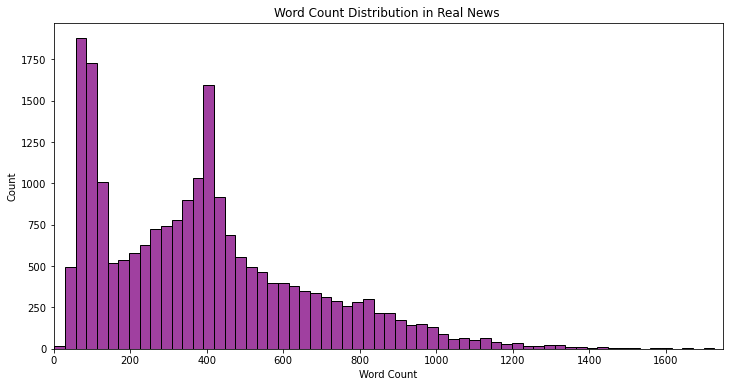

In [6]:
plt.figure(figsize=(12, 6))
plt.title('Word Count Distribution in Real News ')
plt.xlabel('Word Count')
plt.xlim(0,1750)
sns.histplot(real_word_count, color='purple');

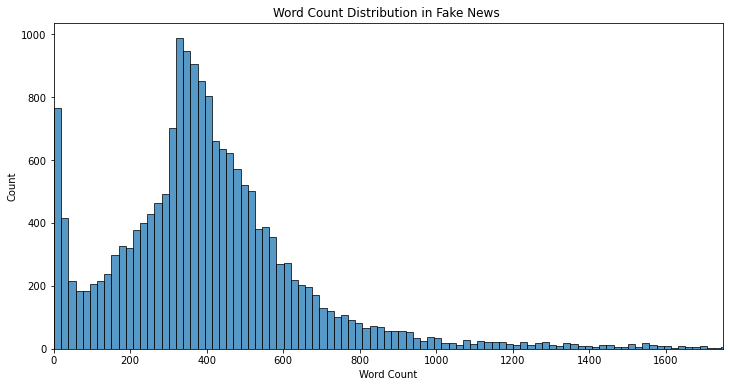

In [7]:
plt.figure(figsize=(12, 6))
plt.title('Word Count Distribution in Fake News ')
plt.xlabel('Word Count')
plt.xlim(0,1750)
sns.histplot(fake_word_count);

The word count distribution in both real and fake news don't differ that much. We can note that the real news article have an higher count of short articles, around 60 words. The number of words in the fake news articles peak around 360. Other than that, the number of articles in both real and fake news is drastically dropping after 600 words.
We can look at some statistics to have more accurate numbers:

In [8]:
fake_word_count.describe()

count    18647.000000
mean       441.879015
std        428.412754
min          1.000000
25%        267.000000
50%        381.000000
75%        516.000000
max       8436.000000
Name: text_word_count, dtype: float64

The average word count for the fake news article is 442 words and 95% of the fake news articles have between 1 and 857 words. There are some outliers like the longest article with 8436 words

In [9]:
real_word_count.describe()

count    21211.000000
mean       393.485739
std        280.953319
min          2.000000
25%        151.000000
50%        366.000000
75%        536.000000
max       5175.000000
Name: text_word_count, dtype: float64

For the real news articles, the average is 393 words per article and 95% of these articles have between 2 and 787 words. The longest article has 5175 words. 
In conclusion, real news articles are slightly shorter. Let's see if it the same for the titles word count:

In [10]:
fake_title_word_count = df[df['is_true'] == 0]['title_word_count']
real_title_word_count = df[df['is_true'] == 1]['title_word_count']

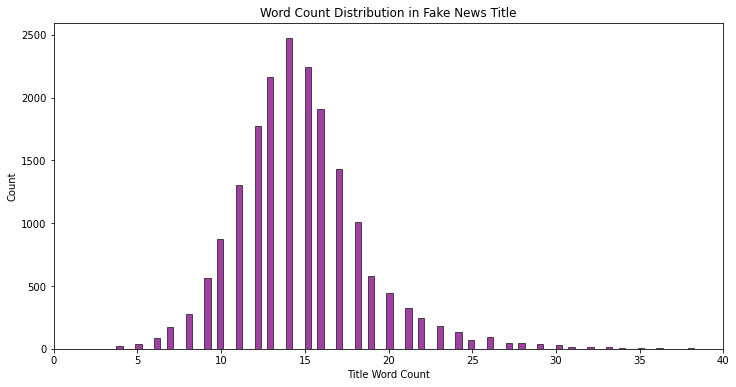

In [11]:
plt.figure(figsize=(12, 6))
plt.title('Word Count Distribution in Fake News Title')
plt.xlabel('Title Word Count')
plt.xlim(0,40)
sns.histplot(fake_title_word_count, color='purple');

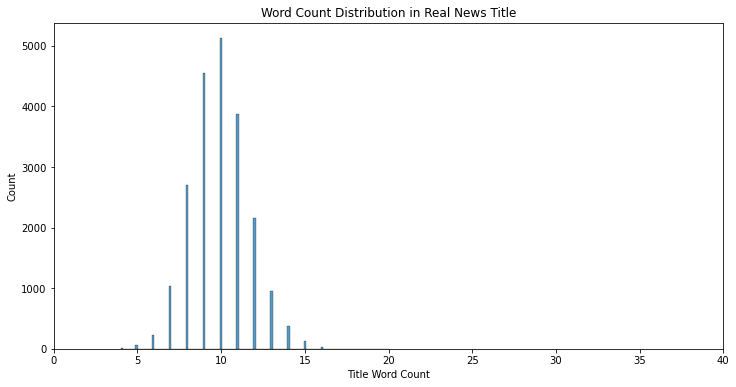

In [12]:
plt.figure(figsize=(12, 6))
plt.title('Word Count Distribution in Real News Title')
plt.xlabel('Title Word Count')
plt.xlim(0,40)
sns.histplot(real_title_word_count);

If we compare the titles for the real and fake news articles, we can observe a difference where the real news articles have shorter title between 5 and 15 words, most of these titles have around 10 words. Fake news titles are slightly longer. Most of the fake news titles have around 14 words. We can see that there are a number of titles with more than 20 words for the fake news.

Some titles and articles contains special characters. It would be interesting to look at the proportion of special characters for the titles and text of real and fake news to see if we can see a difference. First, let's create a special character ratio for the title and the text:

In [13]:
df['title_special_ratio'] = df['title_special_count']/df['title_all_letter_count']
df['text_special_ratio'] = df['text_special_count']/df['text_all_letter_count']

In [14]:
fake_special_ratio = df[df['is_true']==0]['text_special_ratio']
real_special_ratio = df[df['is_true']==1]['text_special_ratio']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


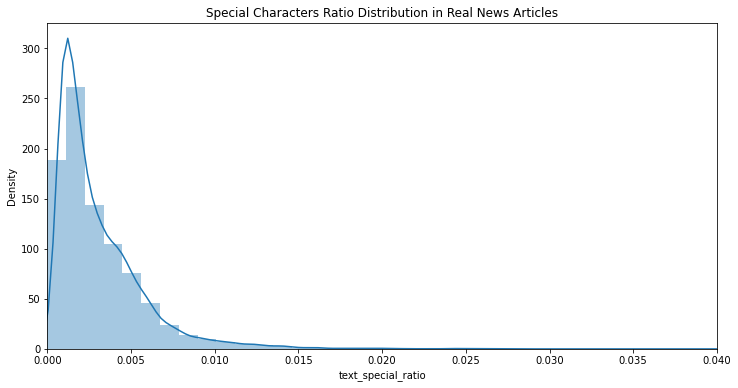

In [15]:
plt.figure(figsize=(12, 6))
plt.xlim(0,0.04)
plt.title('Special Characters Ratio Distribution in Real News Articles')
plt.xlabel('Special Characters Ratio')
sns.distplot(real_special_ratio);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


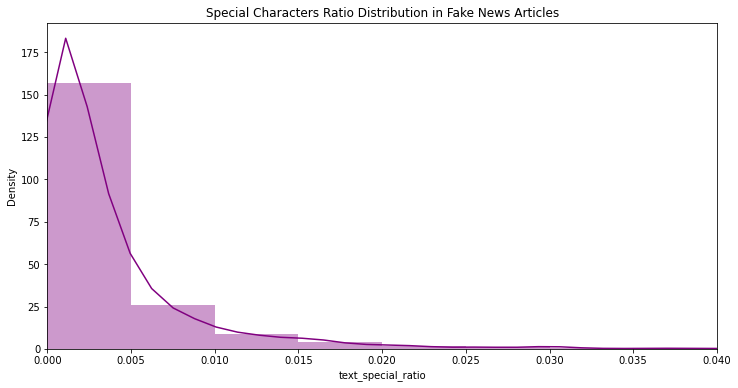

In [16]:
plt.figure(figsize=(12, 6))
plt.title('Special Characters Ratio Distribution in Fake News Articles')
plt.xlabel('Special Characters Ratio')
plt.xlim(0,0.04)
sns.distplot(fake_special_ratio, color='purple');

Most values are have a ratio between 0 and 0.005 in both real and fake news. The distributions are very similar but the fake news articles contains a bit more special characters, if we look above 0.015 the fake news distribution have more values.

## Sentiment Analysis

Because we computed the sentiment analysis scores for each articles, we can analyze the difference between the fake news and the real articles:

In [17]:
df.groupby('is_true')['text_sa_neg'].mean()

is_true
0    0.090736
1    0.073664
Name: text_sa_neg, dtype: float64

For the negativity score, real and fake articles are pretty similar with only a 2% between the two. Again, this is pretty small but the fake news texts have a slight more negative score

In [18]:
df.groupby('is_true')['text_sa_pos'].mean()

is_true
0    0.088368
1    0.078855
Name: text_sa_pos, dtype: float64

Again, not much of a difference for the average positive score. The fake news articles in this data frame have a slightly higher positive score but with only 1% more on the positive score

In [19]:
df.groupby('is_true')['text_sa_neu'].mean()

is_true
0   -0.072359
1    0.071619
Name: text_sa_neu, dtype: float64

The average neutral score for the real news articles is 7% while the fake news articles have a negative 7% score.

In [20]:
df.groupby('is_true')['title_sa_neg'].mean()

is_true
0    0.154875
1    0.119374
Name: title_sa_neg, dtype: float64

the average negative score for the real news titles is 11% against 15% for the fake news. Once again; the fake news titles seems to have a slightly more negative tone.

In [21]:
df.groupby('is_true')['title_sa_pos'].mean()

is_true
0    0.082655
1    0.080463
Name: title_sa_pos, dtype: float64

If we look at the positive scores for the titles; both classes have around the same score, the difference here is negligible.

We created a column containing the count of special characters, notably the hashtags, so we are able to see if there is a difference between hashtags usage in fake and real article:

In [22]:
df.groupby('is_true')['text_#'].sum()

is_true
0    6469
1     437
Name: text_#, dtype: int64

The difference is significant here as we can see above. 6469 fake news articles contained hashtags while only 437 real news articles had an hashtag in them. It would be interesting to see if our models pick up on this. Let's plot this difference:

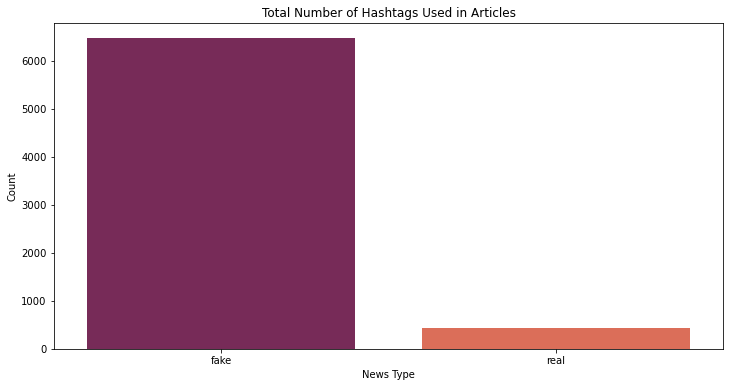

In [23]:
contains_hashtag = [df[df['is_true']==0]['text_#'].sum(),df[df['is_true']==1]['text_#'].sum()]


hash_df = pd.DataFrame(contains_hashtag)

hash_df['label']= ['fake','real']

hash_df.columns = ['Count','News Type']

plt.figure(figsize=(12, 6))
sns.barplot(x='News Type', y = 'Count', data = hash_df, palette='rocket')
plt.title('Total Number of Hashtags Used in Articles');

## Part Of Speech Analysis

In [24]:
pd.set_option('display.max_rows', None)

The Part of Speech tagging allow us to analyze the difference in syntaxes for the real news and fake news articles. Let's look at some statistics:

In [25]:
df.groupby('is_true')['ADJ_prop', 'ADP_prop', 'ADV_prop', 'AUX_prop',
       'CCONJ_prop', 'DET_prop', 'INTJ_prop', 'NOUN_prop', 'NUM_prop',
       'PART_prop', 'PRON_prop', 'PROPN_prop', 'PUNCT_prop', 'SCONJ_prop',
       'SPACE_prop', 'SYM_prop', 'VERB_prop', 'X_prop'].describe().T

<ipython-input-25-dff1fcaebfa8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('is_true')['ADJ_prop', 'ADP_prop', 'ADV_prop', 'AUX_prop',


is_true                      0             1
ADJ_prop   count  18647.000000  21211.000000
           mean       0.058587      0.064279
           std        0.026222      0.019114
           min        0.000000      0.000000
           25%        0.046753      0.052632
           50%        0.058104      0.064103
           75%        0.070248      0.075601
           max        1.000000      0.184211
ADP_prop   count  18647.000000  21211.000000
           mean       0.090301      0.104988
           std        0.025954      0.018771
           min        0.000000      0.000000
           25%        0.079787      0.093633
           50%        0.092382      0.104508
           75%        0.104478      0.115996
           max        0.333333      0.216667
ADV_prop   count  18647.000000  21211.000000
           mean       0.042658      0.023513
           std        0.019429      0.011791
           min        0.000000      0.000000
           25%        0.031414      0.015873
           50%        0.042587      0.023451
           75%        0.053770      0.030534
           max        0.250000      0.109375
AUX_prop   count  18647.000000  21211.000000
           mean       0.040327      0.034330
           std        0.016536      0.013708
           min        0.000000      0.000000
           25%        0.032258      0.026117
           50%        0.041009      0.034356
           75%        0.049822      0.042471
           max        0.222222      0.132075
CCONJ_prop count  18647.000000  21211.000000
           mean       0.024064      0.022452
           std        0.011263      0.009773
           min        0.000000      0.000000
           25%        0.017751      0.016667
           50%        0.024076      0.022624
           75%        0.030501      0.028388
           max        0.142857      0.079545
DET_prop   count  18647.000000  21211.000000
           mean       0.098918      0.099120
           std        0.027367      0.019168
           min        0.000000      0.000000
           25%        0.088336      0.088235
           50%        0.101351      0.099624
           75%        0.113703      0.111111
           max        0.285714      0.179245
INTJ_prop  count  18647.000000  21211.000000
           mean       0.001721      0.000173
           std        0.009185      0.001052
           min        0.000000      0.000000
           25%        0.000000      0.000000
           50%        0.000000      0.000000
           75%        0.002198      0.000000
           max        1.000000      0.044444
NOUN_prop  count  18647.000000  21211.000000
           mean       0.155572      0.178300
           std        0.042245      0.033235
           min        0.000000      0.000000
           25%        0.137046      0.158273
           50%        0.157746      0.179070
           75%        0.179671      0.200000
           max        0.666667      0.309524
NUM_prop   count  18647.000000  21211.000000
           mean       0.014367      0.016064
           std        0.014250      0.013788
           min        0.000000      0.000000
           25%        0.004966      0.007009
           50%        0.010799      0.013289
           75%        0.019437      0.022222
           max        0.186916      0.178404
PART_prop  count  18647.000000  21211.000000
           mean       0.025368      0.029913
           std        0.012383      0.012610
           min        0.000000      0.000000
           25%        0.018396      0.022106
           50%        0.025424      0.029630
           75%        0.032558      0.037037
           max        0.166667      0.111111
PRON_prop  count  18647.000000  21211.000000
           mean       0.046995      0.025371
           std        0.026087      0.015899
           min        0.000000      0.000000
           25%        0.029412      0.014493
           50%        0.045455      0.023305
           75%        0.062701      0.033617
           max        0.400000      0.15

If we look at the adjectives first (ADJ_prop), both classes have roughly the same average score but the real articles use a little bit more adjectives with an average score of 6.4% against 5.8% for the fake news article.

Next, we'll look at the adposition (ADP_prop) average scores. There is a tiny bit more usage of adposition in the real news articles with 10% compared to an average score of 9% in the fake news articles

For the Adverbs(ADV_prop), The fake news articles have an average score of 4.3% while the real articles have an average score of 2.3%. Fake news articles use a little bit more adverbs

If we look at the auxiliary (AUX_prop) section of these descriptive statistics, we can also observe a slight difference even though the average scores are really close. Fake news articles have an average score of 4% against 3.4% for the real news articles

Next we have the conjunctions (CCONJ_prop) and determiner (DET_prop) where both classes show similar average score. This is not surprising because determiner and conjunctions don't weight on the writings objectivity.

One difference here is the use of interjections (INTJ_prop) where the average scores are pretty low on both classes. Nevertheless, fake news article employed them more than the real news articles. The average use of interjection is 0.17% in fake news article when the real news articles have a score of 0.0017%, in other word not a lot of interjections !

Overall, the usage of Nouns(NOUN_prop), Numerals(NUM_prop), particles(PART_prop) is about the same in both classes. We can observe a difference in pronouns usage (PRON_prop), where the fake news articles use them a bit more. The average score for the fake news articles is 4.6% against 2.5% for the real news articles

Again, There are no major differences between fake and real news in the use of proper nouns(PROPN_prop), punctuation(PUNCT_prop), suboordinating conjunction(SCONJ_prop). We can notice a difference of space(SPACE_prop) usage between the two classes. The fake news have an average score of 4.6% against 1.3% for the real news articles.

There is also a difference in symbols(SYM_prop) usage that was highlighted by the hashtag plot. The fake news articles contains more symbols than the real news articles with an average score of 0.2% against. 0.1%. There is no difference in verb usage for both classes.

To conclude, The Part of Speech tagging didn't highlight major differences between real and fake news articles and they were some differences, the gap wasn't that big. It's probably not going to be the best features for our models 

## EDA on word count

In [26]:
sparse_vec = sparse.load_npz('../datasets/sparse_vec_df.npz')
vec_df = pd.DataFrame.sparse.from_spmatrix(sparse_vec)
vec_df.columns = pd.read_csv('../datasets/vec_df_cols.csv').loc[:,'0']

In [27]:
vec_df.head()

0,aal,aardvark,aba,aback,abacus,abandon,abandoned,abandoning,abandonment,abandons,...,zonation,zone,zoned,zones,zoning,zoo,zoom,zorro,zu,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


If we look at the vectorized dataframe, we can find which words are used the most and break it down to real and fake news to see if there are any noticeable differences:

In [28]:
vec_df.sum().sort_values(ascending=False).head(15)

0
trump         124502
said          123697
president      49722
people         37094
state          31282
new            28310
government     25804
house          25327
states         24503
republican     24304
year           22454
just           21722
united         21688
told           20990
white          20238
dtype: int64

The most frequently used word in all the articles from the database is 'trump' ! And the second one is 'said'. This is very telling on the nature of those articles. Mostly relate to politics as we see on this list: 'president', 'state','government','republican'. We can illustrate our findings with a word cloud:

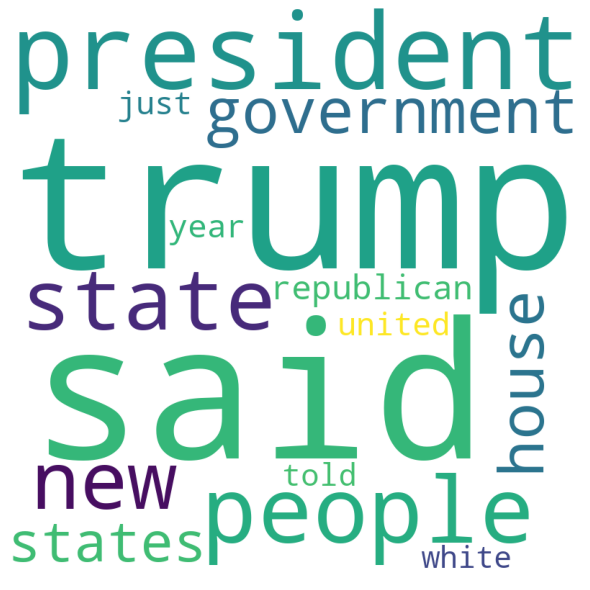

In [29]:
most_common_word = vec_df.sum().sort_values(ascending=False).head(15)

common_words = most_common_word.to_dict()


stopwords = set(STOPWORDS) 


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(frequencies=common_words)


plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
    



Is there any differences between real news articles and fake news articles in terms of frequently used words ? Let's find this out:

For this part we'll use the dataframe with the target and TFIDF applied so we only have the 577 most important words 

In [30]:
X_train = pd.read_csv('../datasets/X_train_w_SA_and_words.csv')
X_test = pd.read_csv('../datasets/X_test_w_SA_and_words.csv')
y_train = pd.read_csv('../datasets/y_train.csv')
y_test = pd.read_csv('../datasets/y_test.csv')
y_train['train_dataset'] = 1
y_test['train_dataset'] = 0
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
df2 = pd.concat([X, y], axis = 1)

Fake news:

In [56]:
df2.drop(df2.iloc[:, 0:47],axis=1).drop('train_dataset', axis=1)[df2['is_true']==0].sum().sort_values(ascending=False).head(15)

trump       64283.0
presid      19248.0
peopl       18902.0
just        18125.0
new         18056.0
like        17555.0
said        16276.0
state       15234.0
say         14286.0
make        12732.0
imag        11881.0
american    11875.0
time        11486.0
white       10778.0
support     10246.0
dtype: float64

real news:

In [58]:
df2.drop(df2.iloc[:, 0:47],axis=1).drop(['train_dataset','is_true'], axis=1)[df2['is_true']==1].sum().sort_values(ascending=False).head(15)

said          71142.0
trump         40379.0
state         28004.0
presid        24826.0
new           18468.0
say           17066.0
govern        16829.0
hous          16631.0
unit          16113.0
republican    15039.0
senat         14803.0
told          14087.0
offici        13207.0
peopl         12375.0
nation        12305.0
dtype: float64

Even though the words here are stems, we can compare both classes. Trump is the most frequently used word in the fake news articles and second in the real news articles but if we look at the frequency number, we can see that he is mentioned more in the real news articles (40379 > 19248)

The president word is also used more frequently in the real news articles with 24826 mentions compared to the 19248 mentions in the fake news articles.

Republican is one of the 15 most frequently used word in the real news articles but is not a top word for the fake news article.

Another difference is that one of the top word in the fake news articles is american while it is not in the top 15 words of the real news articles. Instead they the word nation very frequently and this word is not in the top 15 words of the fake news articles.

Both classes relate in term of subjects, mainly political, but the frequent words in the real news articles are about the government like 'gover, house, senate'.